In [4]:
from utils import draw_dot
from Tensor import Tensor

In [7]:
a = Tensor(2, 'a')
b = Tensor(3, 'b')

c = a + b; c.label='c'

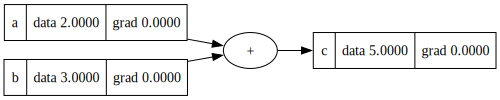

In [8]:
draw_dot(c)